# License Plate Detection and Recognition (Demo/Showcase Only)
**NOTE: This notebook is for demonstration purposes only and does not represent the final solution used in this project.**

## Important Notice

This implementation is provided as a showcase of one possible approach to license plate recognition. However, it has several limitations:

- EasyOCR doesn't perform well for license plate recognition without specific transfer learning
- The recognition accuracy is significantly lower than the final solution implemented in this project
- This approach was ultimately not used in the final version of the license plate recognition system

For the production-grade solution with better accuracy and performance, please refer to the main implementation in this repository.

In [4]:
# Fix for 'ImportError: cannot import name model_urls from torchvision.models.vgg'
import torchvision
import sys

# Check if model_urls is missing in the vgg module
if not hasattr(torchvision.models.vgg, 'model_urls'):
    # Add the model_urls dict that EasyOCR expects
    torchvision.models.vgg.model_urls = {
        'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
        'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
        'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
        'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
        'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
        'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
        'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
        'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
    }
    print("Added missing model_urls to torchvision.models.vgg")
else:
    print("model_urls already exists in torchvision.models.vgg")

Added missing model_urls to torchvision.models.vgg


In [5]:
# Now import easyocr after the fix has been applied
import easyocr
from ultralytics import YOLO
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [8]:
# Initialize YOLOv8 model
model = YOLO('../../models/trained/license_plate_detector6/weights/best.pt')

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [14]:
def preprocess_plate_image(plate_crop):
    # Convert to grayscale
    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)
    
    return thresh

In [15]:
def process_image(image_path):
    # Read image
    img = cv2.imread(image_path)
    
    # Detect license plates
    results = model(img)
    
    # Process each detection
    for result in results[0].boxes.data:
        x1, y1, x2, y2, score, class_id = result
        
        # Convert coordinates to integers
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        
        # Crop license plate
        plate_crop = img[y1:y2, x1:x2]
        
        # Preprocess the cropped plate image
        preprocessed_plate = preprocess_plate_image(plate_crop)
        
        # Read text from the plate
        readings = reader.readtext(preprocessed_plate)
        
        # Extract the text
        if readings:
            plate_text = ''.join([text[1] for text in readings])
            print(f'Detected plate: {plate_text}')
            
            # Draw on image
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, plate_text, (x1, y1-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    return img

0: 448x640 3 license_plates, 189.7ms
Speed: 16.8ms preprocess, 189.7ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)
Speed: 16.8ms preprocess, 189.7ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


Detected plate: 4VHBHD
Detected plate: 04



0: 448x640 2 license_plates, 102.3ms
Speed: 3.7ms preprocess, 102.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
0: 448x640 2 license_plates, 102.3ms
Speed: 3.7ms preprocess, 102.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Detected plate: QEERE?:



0: 480x640 2 license_plates, 100.4ms
Speed: 4.4ms preprocess, 100.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 2 license_plates, 100.4ms
Speed: 4.4ms preprocess, 100.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Detected plate: 'PHF666



0: 480x640 1 license_plate, 92.2ms
Speed: 3.6ms preprocess, 92.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 1 license_plate, 92.2ms
Speed: 3.6ms preprocess, 92.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Detected plate: Ezo2172



0: 448x640 1 license_plate, 139.6ms
Speed: 3.1ms preprocess, 139.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
0: 448x640 1 license_plate, 139.6ms
Speed: 3.1ms preprocess, 139.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Detected plate: ECUAUORLCA-850


Detected plate: "dL(


0: 384x640 (no detections), 168.1ms
Speed: 2.5ms preprocess, 168.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Speed: 2.5ms preprocess, 168.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


0: 480x640 1 license_plate, 138.0ms
Speed: 3.8ms preprocess, 138.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 1 license_plate, 138.0ms
Speed: 3.8ms preprocess, 138.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


0: 448x640 1 license_plate, 82.7ms
Speed: 2.7ms preprocess, 82.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
0: 448x640 1 license_plate, 82.7ms
Speed: 2.7ms preprocess, 82.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Detected plate: 39KCBL?



0: 640x640 1 license_plate, 177.6ms
Speed: 5.3ms preprocess, 177.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 1 license_plate, 177.6ms
Speed: 5.3ms preprocess, 177.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


0: 448x640 1 license_plate, 87.3ms
Speed: 2.8ms preprocess, 87.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
0: 448x640 1 license_plate, 87.3ms
Speed: 2.8ms preprocess, 87.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Detected plate: Jay"CablinideHAMSTUR
Detected plate: la2006SBeji
Detected plate: la2006SBeji


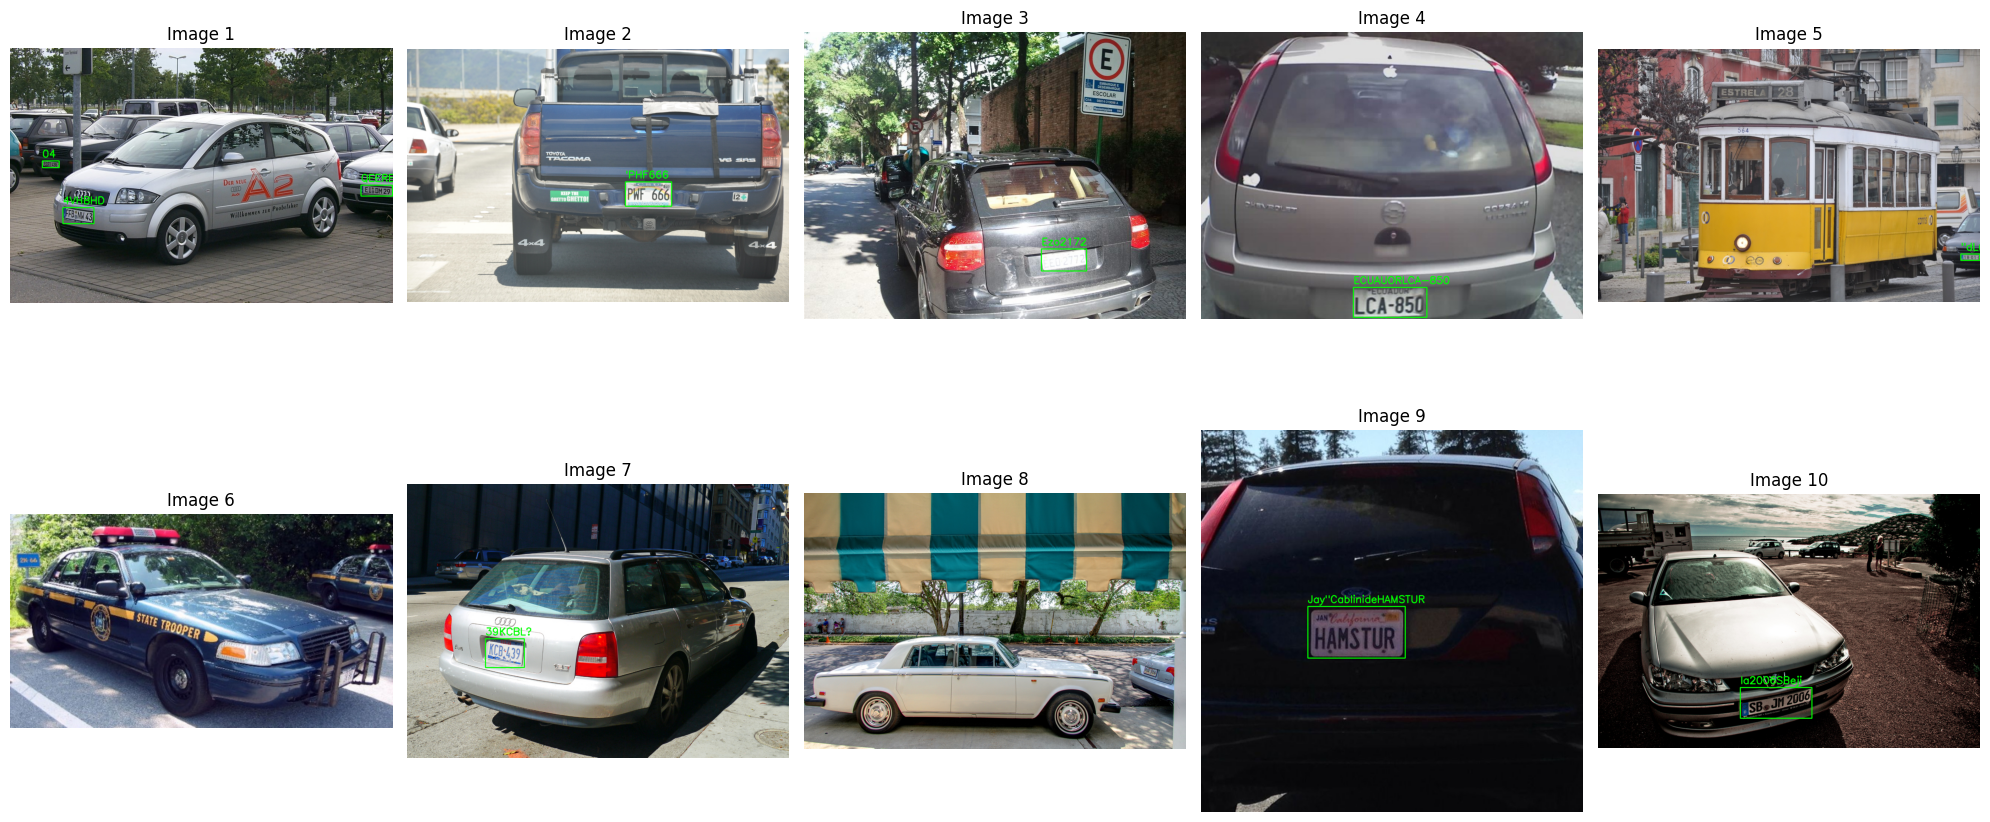

In [16]:
# Get list of test images
test_dir = '../../datasets/license_plate_dataset/images/test'
image_files = os.listdir(test_dir)

# Randomly select 10 images
selected_images = random.sample(image_files, 10)

# Create a figure with subplots
fig = plt.figure(figsize=(20, 10))

# Process and display each image
for idx, image_file in enumerate(selected_images, 1):
    image_path = os.path.join(test_dir, image_file)
    result_img = process_image(image_path)
    
    plt.subplot(2, 5, idx)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()